In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # scaling transform
from sklearn.metrics import accuracy_score, zero_one_loss


# EXPLORATION

In [33]:
tr = pd.read_csv("./train.csv")


In [34]:
tr['comment_text'][0] # shows an example of a possible text in the training dataset

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [35]:
lens = tr.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(394.0732213246768, 590.7202819048923, 5000)

<Axes: >

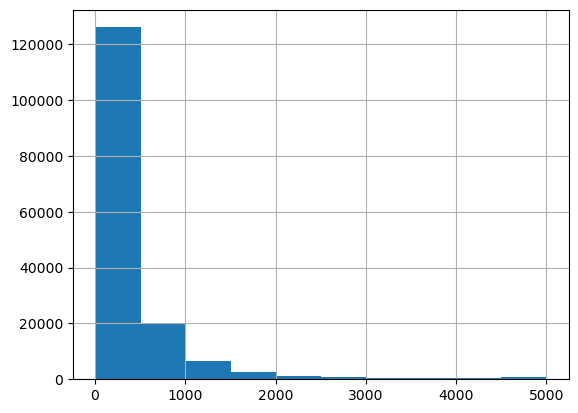

In [36]:
lens.hist()

In [37]:
x=tr.iloc[:,2:].sum() #grabs the sum of all the 'tags' and values that equal 1 for any of the toxicity classes
#marking comments without any tags as "clean"
x.index
rowsums=tr.iloc[:,2:].sum(axis=1) 
tr['noclass']=(rowsums==0) #labels the rows with all '0' for the toxicity as clean
#count number of clean entries
tr['noclass'].sum()
print("Total comments = ",len(tr))
print("Total comments with no classes = ",tr['noclass'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total comments with no classes =  143346
Total tags = 35098


total number of occurances for toxic: 15294
total number of occurances for severe_toxic: 1595
total number of occurances for obscene: 8449
total number of occurances for threat: 478
total number of occurances for insult: 7877
total number of occurances for identity_hate: 1405
total number of occurances for noclass: 143346


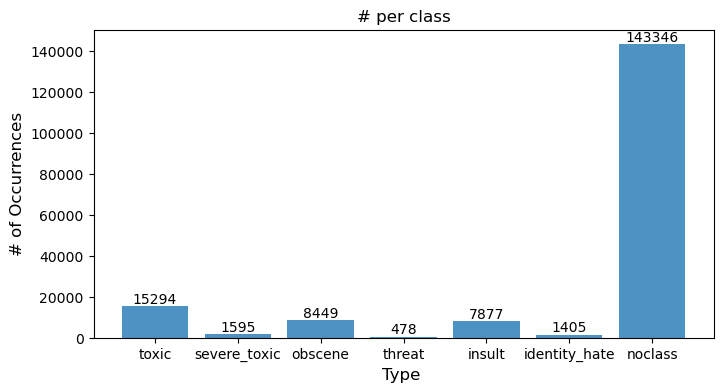

In [55]:
x=tr.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= plt.bar(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
l = []
i =0
for rect, label in zip(rects, labels):
    height = rect.get_height()
    print(f'total number of occurances for {x.index[i]}: {height}')
    l.append(height)
    i+= 1

plt.bar_label(ax, labels=l)

plt.show()

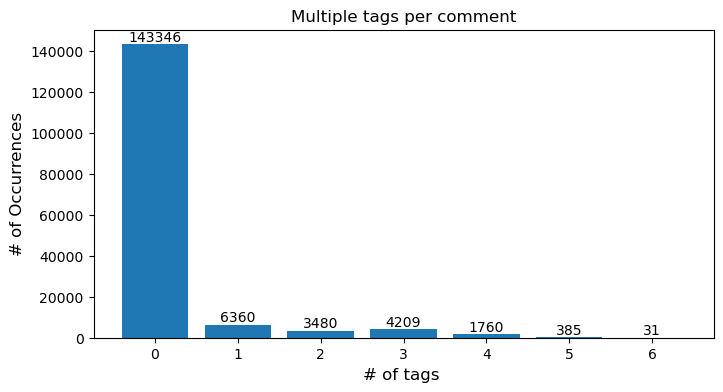

In [52]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = plt.bar(x.index, x.values)
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
l = []
for rect, label in zip(rects, labels):
    height = rect.get_height()
    l.append(height)
    
plt.bar_label(ax, labels=l)

plt.show()

In [ ]:
#explain that we visualized our data and at first glance we saw that there is a lot of clean data (data representation)

In [ ]:
#discuss the graph and explain how a comment can have  multiple tags and different types of toxicity 

In [ ]:
#show the number of unique words over total words (illustrate the point that the bag of words will be sparse)